# Load Dummy Dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Plotting Data

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# read csv
dummy = pd.read_csv('gdrive/My Drive/skripswi/data-dummy.csv')

# assign label name
def set_label(row_number, assigned_value):
  return assigned_value[row_number]

label_name = {1: 'positif', 2: 'negatif', 3: 'netral'}
dummy['nama_label'] = dummy['label'].apply(set_label, args=(label_name, ))

col = ['text', 'label', 'nama_label']
dummy = dummy[col]
dummy.head()

,text,label,nama_label
0,Tuhh anak gubernur Jabar gimana??? Tentu pembu...,3,netral
1,Ada benernya jg kalau disegmen2kan gitu yang p...,3,netral
2,Jadi sistem zonasi masih ada ya. Rumah gw baik...,3,netral
3,Check out a great #article Legislator Akui Sis...,3,netral
4,Sekolah zonasi aja udah kek gini janganlah ka...,3,netral


netral     150
positif    137
negatif    110
Name: nama_label, dtype: int64


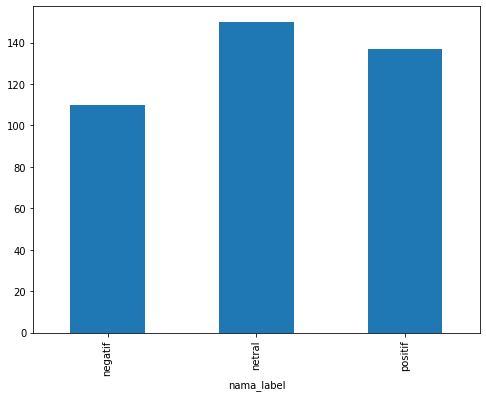

In [0]:
print(dummy['nama_label'].value_counts())
fig = plt.figure(figsize=(8,6))
dummy.groupby('nama_label').text.count().plot.bar(ylim=0)
plt.show()

# Preprocessing

In [0]:
!pip install sastrawi

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

dictionary = np.array([word.replace('\n', '') for word in open("./gdrive/My Drive/skripswi/kata-dasar.txt", 'r').readlines()])

# stopword tambahan
stop = ['tp','kl','yg','klo','tpi','yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena',  'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya',  'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'amat', 'apalagi', 'bagaimanapun']
# seleksi stopword yang belum ada pada list stop_words bawaan nltk
stop_add = [x for x in stop if x not in stop_words]
for word in stop_add:
  stop_words.add(word)

factory = StemmerFactory()
stemmer = factory.create_stemmer()



     |████████████████████████████████| 215kB 2.6MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def clean_word(word):
  lower = word.lower()
  no_number = re.sub(r'\d+', '', lower)
  no_dash = no_number.replace('-', '')
  no_punctuation = no_dash.translate(str.maketrans('', '', string.punctuation))    
  no_white_space = re.sub(' +', '', no_punctuation)
  stem = stemmer.stem(no_white_space)
  stem = re.sub(' +', '', stem)
  return stem

def tweet_cleaner(tweet):
  clean_tokens = np.array([])
  lower = tweet.lower()
  no_number = re.sub(r'\d+', '', lower)
  no_url = re.sub(r"http\S+", "", no_number)
  no_dash = no_url.replace("-", " ")
  no_punctuation = no_dash.translate(str.maketrans('', '', string.punctuation))
  no_white_space = re.sub(' +', ' ', no_punctuation)
  tokens = word_tokenize(no_white_space)

  for token in tokens:
    if token in dictionary or token in stop_words:    
      clean_tokens = np.append(clean_tokens, token)
    else:    
      stem_token = stemmer.stem(token)
      clean_tokens = np.append(clean_tokens, stem_token)

  # remove stopwords
  no_stopwords = [i for i in clean_tokens if not i in stop_words and i in dictionary]
  
  stem = stemmer.stem(' '.join(no_stopwords))
  result = re.sub(r'\d+', '', ''.join(stem))
  result = re.sub(' +', ' ', result)
  return result

origin_text = dummy.text.to_list()
output_text = []

for i, item in enumerate(origin_text):
  clean_tweet = tweet_cleaner(item)
  output_text.append(clean_tweet)

dummy['stem_text'] = output_text
dummy.tail()

,text,label,nama_label,stem_text
392,"Untungnya di tahun ajaran nanti, siatim zonasi...",1,positif,untung ajar zonasi laku jenjang muat nawa cita
393,"21. Saya mendukung juga penerapan Zonasi Guru,...",1,positif,dukung terap zonasi guru moga kualitas didik s...
394,22. Pastinya membantu para guru juga agar gak ...,1,positif,bantu guru murid sowan
395,Wah ada wacana Zonasi guru juga ternyata. Kala...,1,positif,wacana zonasi guru guru profesional sebar kual...
396,27. System zonasi ini merupakan program yang t...,1,positif,zonasi program integrasi bijak utuh hubung tin...


# TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,2))
feature = tfidf.fit_transform(dummy['stem_text']).toarray()   # ini yang dipakai buat klasifikasi
labels = dummy['label']

feature

array([[0.        , 0.        , 0.        , ..., 0.        , 0.22564999,
        0.        ],
       [0.        , 0.53926879, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
print(dummy['label'])

0      3
1      3
2      3
3      3
4      3
      ..
392    1
393    1
394    1
395    1
396    1
Name: label, Length: 397, dtype: int64


# Classification

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import math

x = feature
y = dummy['label']

# tahap splitting data
# test_size=0.20 menunjukkan 20% dari seluruh data digunakan sbg data testing
# X = teks, y = label
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0) 

total_n = int(math.floor(math.sqrt(len(dummy))))

# proses training
# inisialisasi
knn = KNeighborsClassifier(metric='cosine', n_neighbors=6)

# memasukkan data training + label ke model knn
knn.fit(X_train, y_train)

# proses testing
y_pred = knn.predict(X_test)

# print akurasi
print(metrics.accuracy_score(y_test, y_pred))

# laporan akurasi, recall, f1, precision
print(metrics.classification_report(y_test, y_pred, target_names=dummy['nama_label'].unique()))

0.6125
              precision    recall  f1-score   support

      netral       0.61      0.83      0.70        24
     negatif       0.48      0.57      0.52        21
     positif       0.77      0.49      0.60        35

    accuracy                           0.61        80
   macro avg       0.62      0.63      0.61        80
weighted avg       0.65      0.61      0.61        80



# Tuning Hyperparameter

### Tuning menggunakan GridSearchCV

In [0]:
params = {
    'n_neighbors': list(range(1,total_n+1)),
    'metric': ['cosine']
}

# tuning nilai k dari angka 1 hingga akar dari total data
# cv=10 berarti menerapkan 10-Fold Cross Validation
gsc = GridSearchCV(knn, params, n_jobs=-1, cv=10)

gsc_result = gsc.fit(X_train, y_train)

print(gsc_result.best_score_)
print(gsc_result.best_params_)
print(gsc_result.best_estimator_)

# simpan hasil cross validation ke dataframe
gsc_df = pd.DataFrame(gsc_result.cv_results_)
gsc_df.head()

0.6446572580645162
{'metric': 'cosine', 'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001981,0.000568,0.005181,0.001555,cosine,1,"{'metric': 'cosine', 'n_neighbors': 1}",0.46875,0.50000,0.50000,0.56250,0.50000,0.59375,0.56250,0.709677,0.645161,0.451613,0.549395,0.077818,18
1,0.002343,0.001080,0.006647,0.002185,cosine,2,"{'metric': 'cosine', 'n_neighbors': 2}",0.37500,0.53125,0.46875,0.50000,0.56250,0.59375,0.46875,0.741935,0.677419,0.387097,0.530645,0.111632,19
2,0.001915,0.000311,0.006927,0.002711,cosine,3,"{'metric': 'cosine', 'n_neighbors': 3}",0.50000,0.46875,0.56250,0.56250,0.62500,0.50000,0.59375,0.645161,0.677419,0.516129,0.565121,0.066034,17
3,0.001740,0.000108,0.005281,0.001631,cosine,4,"{'metric': 'cosine', 'n_neighbors': 4}",0.53125,0.46875,0.56250,0.65625,0.59375,0.53125,0.59375,0.645161,0.645161,0.580645,0.580847,0.056669,15
4,0.001712,0.000137,0.006093,0.002221,cosine,5,"{'metric': 'cosine', 'n_neighbors': 5}",0.59375,0.43750,0.53125,0.59375,0.59375,0.46875,0.59375,0.645161,0.645161,0.677419,0.578024,0.073321,16


### Plot grafik nilai *K*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


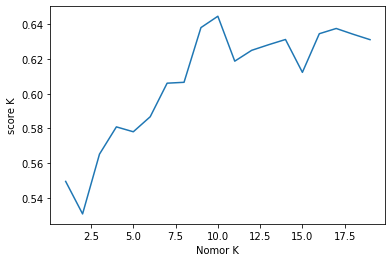

In [0]:
import matplotlib.pyplot as plt

meanscore = gsc_df['mean_test_score']
k_range = range(1, total_n+1)
k_score = meanscore.as_matrix()

plt.plot(k_range, k_score)
plt.xlabel('Nomor K')
plt.ylabel('score K')
plt.show()

In [0]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
scores = []

clf = gsc_result.best_estimator_
i=1
y_test_reindex = y_test.reset_index(drop=True)

for _,test_index in kf.split(y_test):
  # print('FOLD ', i)
  # print("TEST: ", test_index)
  test_data = X_test[test_index]
  test_label = y_test_reindex[test_index]    
  pred_label = clf.predict(test_data)  
  scores.append(metrics.accuracy_score(test_label, pred_label))
  # print(metrics.accuracy_score(test_label, pred_label))
  i+=1

print(np.mean(scores))

0.575


### Tuning manual

[0.5625, 0.525, 0.55, 0.575, 0.6, 0.6125, 0.575, 0.575, 0.5375, 0.575, 0.5625, 0.55, 0.5625, 0.575, 0.4875, 0.525, 0.525, 0.5375]


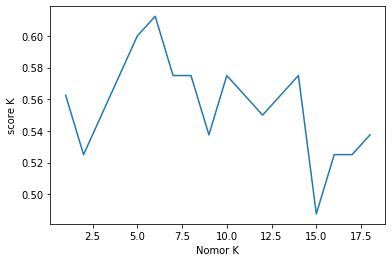

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
k_range = range(1,19)
k_score = []
i=1
y_test_reindex = y_test.reset_index(drop=True)

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
  knn.fit(X_train, y_train)
  scores = []
  for _, test_index in kf.split(X_test):  
    test_data = X_test[test_index]  
    test_label = y_test_reindex[test_index]    
    pred_label = knn.predict(test_data)  
    scores.append(metrics.accuracy_score(test_label, pred_label))          
    
    # print(metrics.accuracy_score(y_test, test_predict))    
  
  # print(np.mean(scores))
  k_score.append(np.mean(scores))

print(k_score)
# result = np.where(k_score==np.amax(k_score))
# print(np.amax(k_score), result[0])

plt.plot(k_range, k_score)
plt.xlabel('Nomor K')
plt.ylabel('score K')
plt.show()

dari grafik, terlihat bahwa akurasi terbaik sebesar 0.6125 dengan K=6

# Confusion Matrix

0.6125


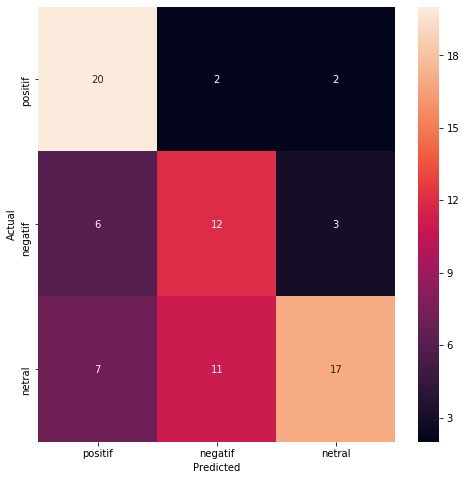

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=6, metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

fig, ax = plt.subplots(figsize=(8,8))
category = dummy[['nama_label', 'label']].drop_duplicates().sort_values('label')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=category['nama_label'].values, yticklabels=category['nama_label'].values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()